In [12]:
import numpy as np
import matplotlib.pyplot as plt
from models.inelastic import SIInel
from detectors.dama import DAMA
from veldists import VelDist
from constants import *

In [13]:
## Define the models and distributions we care about
Det = DAMA()
Model2 = SIInel()
Dist = VelDist("modSHM",0.3) # standard halo model
Dist2 = VelDist("modShards",0.3) # standard halo model + shards

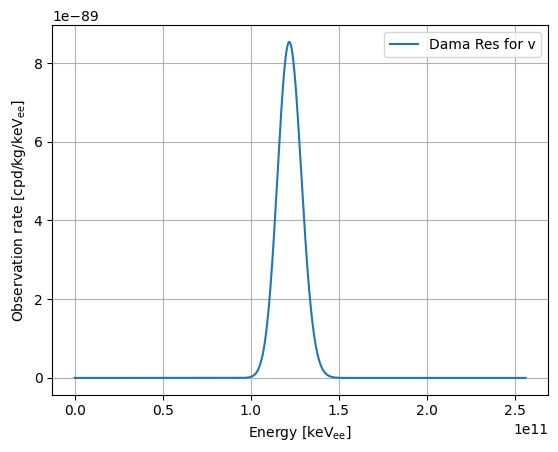

In [16]:
## Example 4: Demonstration of how to define DM rates/interactions without needing to build a new model object
##### Doubles as a demo of how to use the resolution as a multiplier rather than full smearing (in this case the two are equivalent) 

def bsw_a(Target,ER,mX,sig): 
    if ER!=mX:
        return 0
    else:
        C_a = 1.2 * 10**(19)
        g_ae = sig
        dsigdER = (C_a/(Target.A()))*(g_ae**2)*mX*(Target.sigma_PE(ER))
        return dsigdER
def bsw_v(Target,ER,mX,sig): 
    if ER!=mX:
        return 0
    else:
        C_v= 4 * 10**(23)
        kappa = sig
        dsigdER = (C_v/(Target.A()))*(kappa)*(1/mX)*(Target.sigma_PE(ER))
        return dsigdER
def Comp_v(Target,ER,mX,sig):
    if ER != mX:
        return 0
    else :
        n_e = 1 #Electron Number Density
        rho_DM = 0.3*GeV
        kappa = sig
        m_e = 511*keV
        e = 1.6*(10**(-19))
        dsigdER = ((n_e/Target.N_T()) *(rho_DM/mX)*(e**4/24*np.pi*m_e**2)*(kappa**2)*((2*m_e+mX)*(mX**2+2*m_e*mX+2*m_e**2)/(mX+m_e)**3))* 1e24
        return dsigdER
    
def Comp_a(Target,ER,mX,sig):
    if ER != mX:
        return 0 
    else :
        n_e = 1 #Electron Number Density
        rho_DM = 0.3*GeV
        g_ae = sig
        m_e = 511*keV
        e = 1.6*(10**(-19))
        dsigdER = (n_e/Target.N_T())*(rho_DM)*(e**2/16*np.pi*m_e**2)*(g_ae**2)*(mX*(mX+2*m_e)**2)/(m_e+mX)**4 * cm2_to_barn
        return dsigdER

def ER(mX):
    m_e = 511*keV
    E = mX**2/2*(m_e+mX)
    return E

#m = np.arange(10,1000,0.1)
E = np.arange(10,1000,0.1) # observed energy, units of keV_ee
#plt.plot(E,[COSINE().dRdE(e,bsw_a,NR=False,DE=0.01,mX=6.00*keV,sig=1) for e in E])
#plt.plot(E,[COSINE().dRdE_True(6,bsw_a,NR=False,mX=6*keV,sig=1)*COSINE().Res(e,6) for e in E]) ## This model is a delta func so we can just scale gaussian resolution with the max val
plt.plot(E,[DAMA().dRdE_True(690,bsw_a,NR=False,mX=690*keV,sig=1)*DAMA().Res(690,e) for e in E]) ## demonstrate how to use different detector
#plt.plot(E,[DAMA().dRdE_True(690,bsw_v,NR=False,mX=690*keV,sig=1)*DAMA().Res(690,e) for e in E])
#plt.plot(ER(mX=m),[DAMA().dRdE_True(690,Comp_a,NR=False,mX=690*keV,sig=1)*DAMA().Res(e,690) for e in m])
#plt.plot(ER(mX=m),[DAMA().dRdE_True(690,Comp_v,NR=False,mX=690*keV,sig=1e-12)*DAMA().Res(e,690) for e in m])
plt.legend(["Dama Res for v"])
plt.ylabel(r"Observation rate [cpd/kg/keV$_{\rm ee}$]")
plt.xlabel(r"Energy [keV$_{\rm ee}$]")
plt.grid()
plt.show()